# Pair Trading Concepts

Pair trading is one of the strategies many traders and fund managers use to make market neutral trades. Pair trading works best when you have two stocks that are heavily correlated. 

Mostly stocks that are correlated due to the fact that they are in the same sector or have very similar business models and perhaps many other potential reasons. As a result, on average the two stocks will react to market volatility  similarly. 

When the two highly correlated  stocks are subject to market volatility, sometimes the correlation relationship may break causing the stocks to  diverge from each other as they process the market volatility. 

In pair trading  the expectation is that the two stocks will revert back to the mean and move back to be in tandem once again, after processing market volatility. 

Pair trading is considered to be market neutral strategy, meaning the direction of the overall market does not influence the performance of the strategy.

In order to execute the strategy with two correlated stocks, trader simply buys the stock that went under and shorts the stock that went up when they fall out of tandem. The strategy is independent of the market returns as the strategy is only successful if both stock readjust reverting back both to their mean to move in tandem once again. 

If the market was to go down/up over longer periods both stocks will go down/up together on average (as they are highly correlated) without deeply effecting traders portfolio  (as they have a buy and short opened in the market).

One of the key thing in pair trading is to choose the stocks carefully as they need to be highly correlated, adding fundamental analysis to your prerequisite is not such a bad idea after all.

In [2]:
import glob, os
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [305]:
data=web.DataReader(['KO', 'PEP'], 'yahoo', start='2017-09-01')['Adj Close']
#data=pd.DataFrame(data['KO'])
data.tail()

Symbols,KO,PEP
Date,,
2020-06-25,44.930000,131.410004
2020-06-26,43.570000,128.929993
2020-06-29,44.360001,131.080002
2020-06-30,44.680000,132.259995
2020-07-01,44.810001,132.360001


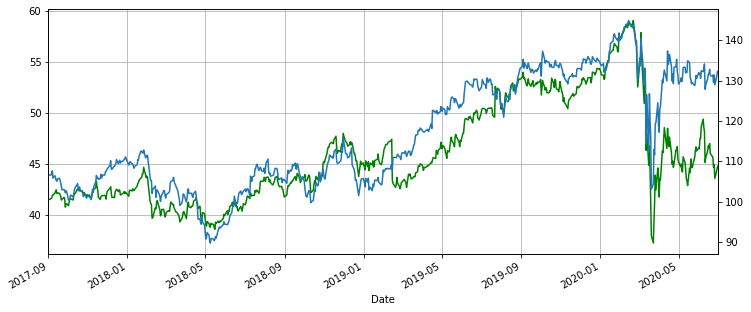

In [306]:
plt.figure(figsize=(12,5))
ax1=data['KO'].plot(label='FDX', grid=True, color='g')
ax2=data['PEP'].plot(secondary_y=True, label='UPS',grid=True)

We can see that the both stocks behave similarly visually as expected. We can check using the correlation function to see how correlated they are quantitavely.

- We should normalize the data in order to help compare stocks of different prices.

In [ ]:
#normalize the data
data=data.pct_change()
#get rid of the double index
data_df=pd.DataFrame(data['KO'])
data_df['PEP']=data['PEP']
data_df

In [ ]:
#drop NaN values
data_df=data_df.dropna()
data_df

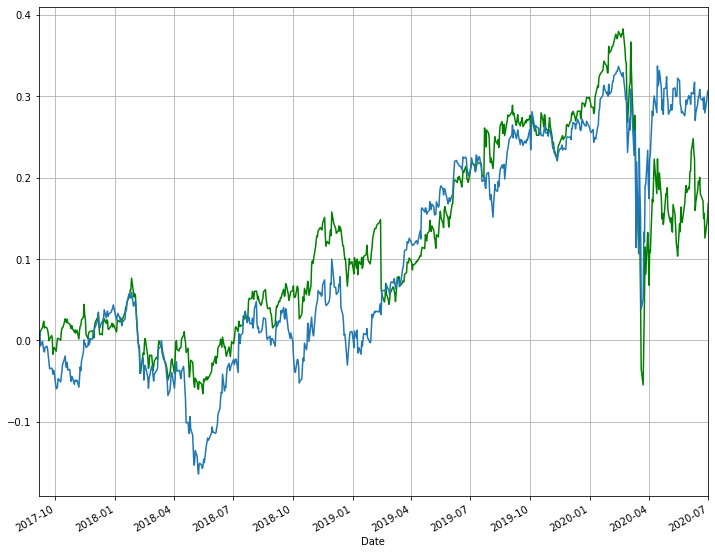

In [302]:
#plot the normalised df
plt.figure(figsize=(12,10))
ax=data_df['KO'].cumsum().plot(grid=True,color='g')
ax=data_df['PEP'].cumsum().plot(grid=True)


When plotting we have summed the daily percentage return using cumsum in order to generate the two stock behaviour sequentially on the same scale.

Some features do standout when looking at the chart, for example we can see that both stocks seem to move together however there are instances where they diverge opening big gap in between them. As mentioned earlier trader would buy the stock that went under and short the stock above, with the plan that they will revert back together eventually. The plot seems to support the concept as after each divergence both stocks revert back to their mean, at times coinciding together.

It is important to note that some of these spreads can get bigger for a while which could put the trade in a loss if trade is executed prematurely. Moreover, some of the spreads could take months to close creating bottlenecks in traders portfolio. Therefore, it is imperative to account for all potential issues before adding the trade to portfolio.


### Statistical analysis

In order to get a signal when the two stocks diverge we need to have a way of measuring the relationship between them. As mentioned before we can use correlation and cointegration. Correlation measures how closely correlated the actual readings of both stocks are whereas cointegration monitors the distance between the two stocks and checks if they are statistically significant. This help us make sure if the two stocks are behaving the same or not. 

In [1]:

from statsmodels.tsa.stattools import coint

#correlation function
def corr(data1, data2):
    "data1 & data2 should be numpy arrays."
    mean1 = data1.mean() 
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()
    corr = ((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr

In [304]:
stock_name_1 = 'KO'
stock_name_2 = 'PEP'

score, pvalue, _ = coint(data_df[stock_name_1], data_df[stock_name_2])
correlation = corr(data_df[stock_name_1], data_df[stock_name_2])

print('Correlation between %s and %s is %f' % (stock_name_1, stock_name_2, correlation))
print('Cointegration between %s and %s is %f' % (stock_name_1, stock_name_2, pvalue))

Correlation between KO and PEP is 0.756450
Cointegration between KO and PEP is 0.000000


- We can see that both stocks have high correlation (correlation of 1 would mean they are identical)
- The p value for the cointegration function is well below 0.05 stating that the movement between the stocks is statistically significant.

### Creating Allerts

One way to detect when there is a spread between the two stocks is to simply plot the difference between stocks. When the spread between stocks reaches a specific threshold we can make an allert.

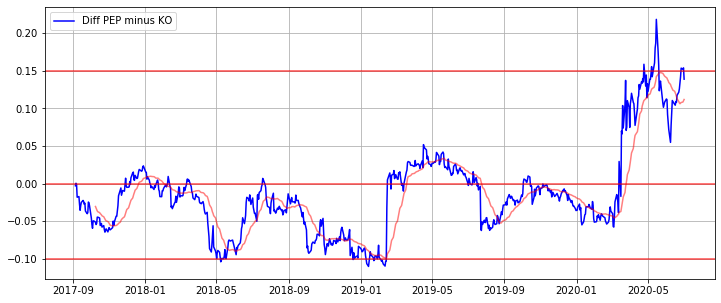

In [228]:
#quick plot

#do make sure they are on the same scale.
smooth1=data_df['PEP'].cumsum() - data_df['KO'].cumsum()
smooth=smooth1.rolling(25).mean()


fig, ax = plt.subplots(figsize=(12,5))
plt.plot(data_df['PEP'].cumsum() - data_df['KO'].cumsum(), color='b', label='Diff PEP minus KO')
plt.plot(smooth, color='red', alpha=0.5)
ax.grid(True)
ax.axhline(y=0, color='red', linestyle='-',alpha=0.7) 
ax.axhline(y=0.15, color='r', linestyle='-',alpha=0.7) 
ax.axhline(y=-0.10, color='r', linestyle='-', alpha=0.7) 
plt.legend(loc=2)
plt.show()

- The threshold were set to be 0.15 and 0.1 since these are the most significant levels in the set timeframe.  

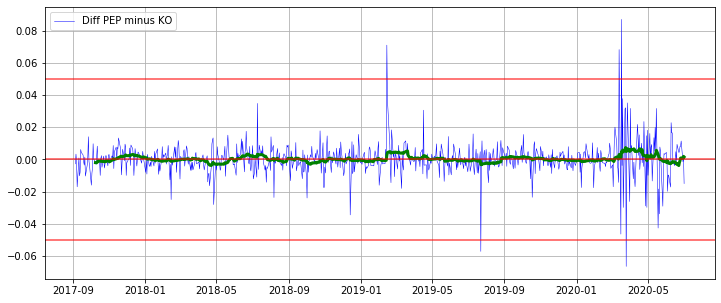

In [293]:
#quick plot
smooth1=data_df['PEP'] - data_df['KO']
smooth=smooth1.rolling(25).mean()


fig, ax = plt.subplots(figsize=(12,5))
plt.plot(data_df['PEP'] - data_df['KO'], linewidth=0.5,color='b', label='Diff PEP minus KO')
plt.plot(smooth, color='green', linewidth=3)
ax.grid(True)
ax.axhline(y=0, color='red', linestyle='-',alpha=0.7) 
ax.axhline(y=0.05, color='r', linestyle='-',alpha=0.7) 
ax.axhline(y=-0.05, color='r', linestyle='-', alpha=0.7) 
plt.legend(loc=2)
plt.show()

### Position allocation

It is imperative that when executing a pair trade the position allocation in terms of dollars is the same. This is to ensure the trade is market neutral; trade cannot be heavy on one side.

We can calculate this given a specific budget.


In [297]:
trading_budget = 1000

In [298]:
# get last trading price for both stocks

#Strong ticker
short_last_close = data['PEP'][-1]
print('Strongest ticker (PEP) , last price: $%f' % ( round(short_last_close,2)))

#Weak ticker
buy_last_close = data['KO'][-1]
print('Weaker ticker (KO) , last price: $%f' % ( round(buy_last_close,2)))


Strongest ticker (PEP) , last price: $132.740000
Weaker ticker (KO) , last price: $45.200000


In [299]:

#Weak ticker
print('For KO at ${}, buy {} shares '.
      format((round(data['KO'][-1],2)), 
             round((trading_budget * 0.5) / buy_last_close,2)))
#Strong ticker
print('For PEP at ${}, buy {} shares '.
      format((round(data['PEP'][-1],2)), 
             round((trading_budget * 0.5) / short_last_close,2)))

For KO at $45.2, buy 11.06 shares 
For PEP at $132.74, buy 3.77 shares 
